# Import Libraries

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import concat,lit

# Project 1 : Created Order Table

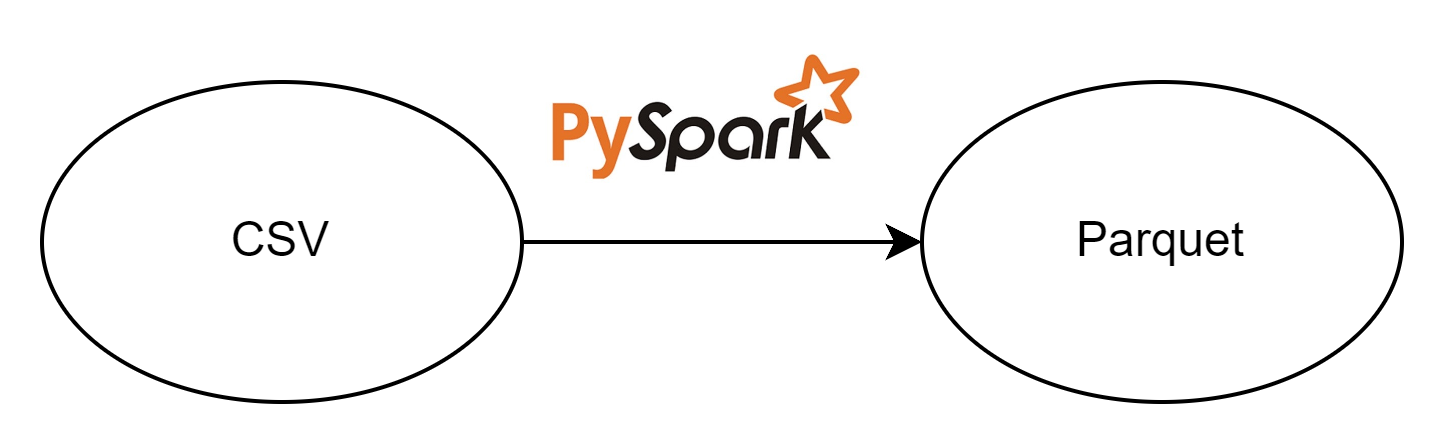

## Read Table from CSV

In [2]:
spark = SparkSession.builder.appName('ProjectSpark').getOrCreate()

In [3]:
import os
source = 'data'
list_table = os.listdir(source)
list_table = [s.replace('.csv', '') for s in list_table]
list_table

['albums',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoices',
 'invoice_items',
 'media_types',
 'playlists',
 'playlist_track',
 'tracks']

In [4]:
for x,i in zip(list_table,list_table):
    globals()[x] = spark.read.csv(f'data/{i}.csv',header=True,inferSchema=True)

In [5]:
playlists = playlists.withColumnRenamed('Name','PlaylistName')
tracks = tracks.withColumnRenamed('Name','ProductName') \
        .drop('UnitPrice')
artists = artists.withColumnRenamed('Name','ArtistName')
genres = genres.withColumnRenamed('Name','GenreName')
employees = employees.withColumn('EmployeeName',\
        concat(employees['FirstName'],lit(' '),employees['LastName']))
employees = employees.select('EmployeeId','EmployeeName')

## Transformation

In [6]:
order = invoice_items.join \
(invoices,invoice_items['InvoiceId']==invoices['InvoiceId'],'left')\
.drop('InvoiceLineId','InvoiceId')
order = order.join \
(tracks,order['TrackId']==tracks['TrackId'],'left').drop('TrackId')
order = order.join \
(albums,order['AlbumId']==albums['AlbumId'],'left').drop('AlbumId')
order = order.join \
(artists,order['ArtistId']==artists['ArtistId'],'left').drop('ArtistId')
order = order.join \
(media_types,order['MediaTypeId']==media_types['MediaTypeId'],'left').drop('MediaTypeId')
order = order.join \
(genres,order['GenreId']==genres['GenreId'],'left').drop('GenreId')
order = order.join \
(customers,order['CustomerId']==customers['CustomerId'],'left').drop('CustomerId')
order = order.join \
(employees,order['SupportRepId']==employees['EmployeeId']).drop('SupportRepId')

## Write to Parquet

In [7]:
order.write.mode('overwrite').parquet("order.parquet")

## Write to PostgresSQL

In [9]:
spark.version

'3.4.0'

In [15]:
mode = "overwrite"
url = "jdbc:postgresql://localhost/postgres"
properties = {"user": "postgres","password": "postgres","driver": "org.postgresql.Driver"}
order.write.jdbc(url=url, table="order_table", mode=mode, properties=properties)